# Capstone Project
- ### Data Extraction

In [4]:
import pandas as pd
from pandasql import sqldf, load_meat
pysqldf = lambda q: sqldf(q,globals())
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

#download the dataset
URL ='https://storage.googleapis.com/asiayo-pic-bed-dev/wine_data.csv'
wine = pd.read_csv('https://storage.googleapis.com/asiayo-pic-bed-dev/wine_data.csv')

print(wine.head())
print(wine.describe())
wine.isnull().sum()

   Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

- ### Clean Dataset

In [5]:
wine[wine.country.isna() == True]
wine[(wine.country.isna() == True) & (wine.province.isna() == True)]

wine_clean = wine[~((wine.country.isna()==True) & (wine.province.isna() == True))]
wine_clean.shape
wine_clean.columns

print(wine_clean.country.nunique())
print(wine_clean.variety.nunique())
wine_clean.groupby("variety")["points"].mean().sort_values(ascending = False).head(10)

48
632


variety
Cabernet-Shiraz    96.000000
Tokay              93.294118
Sirica             93.000000
Blauburgunder      93.000000
Trousseau Gris     93.000000
Muscadel           92.900000
Roviello           92.500000
Moscato di Noto    92.000000
Torontel           92.000000
Carignan-Syrah     92.000000
Name: points, dtype: float64

- ### Visualize the Dataset

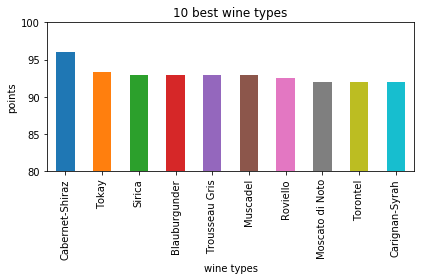

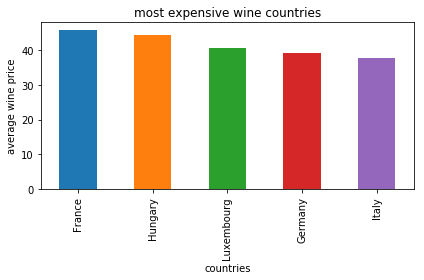

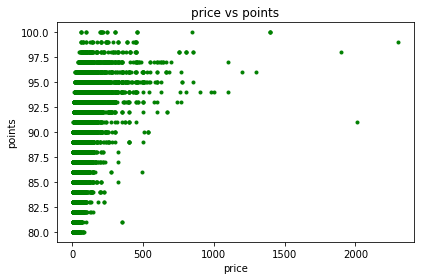

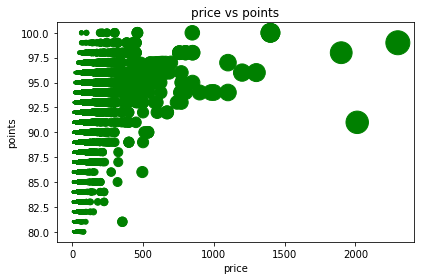

In [6]:
s = wine_clean.groupby("variety")["points"].mean().sort_values(ascending = False).head(10)
s.plot.bar()
plt.xlabel("wine types")
plt.ylabel("points")
plt.title("10 best wine types")
plt.tight_layout()
plt.ylim(80,100)
plt.show()

wine_clean.groupby("country")["points"].mean().nlargest(8)
wine_clean.country.value_counts()

wineer_countries = wine_clean.groupby("country")["points"].mean().nlargest(9)[1:]
wineer_countries

wine_clean.groupby("country")["price"].mean().sort_values(ascending = False).head(5)

wine_clean.loc[wine_clean.country == "US-France"].index

wine_clean = wine_clean.drop(144054, axis = 0)
wine_clean.country.value_counts()


wine_clean.groupby("country")["price"].mean().sort_values(ascending = False).head(6)[1:6]
average_price_countries = wine_clean.groupby("country")["price"].mean().sort_values(ascending = False).head(6)[1:6]

average_price_countries.plot.bar()
plt.xlabel("countries")
plt.ylabel("average wine price")
plt.title("most expensive wine countries")
plt.tight_layout()
plt.show()

wine_clean[wine_clean.points == 100].count()
wine_clean[wine_clean.points == 100]["variety"].value_counts()

wine_clean["price"].corr(wine_clean["points"])

plt.scatter(x = wine_clean.price, y = wine_clean.points, c = "g", marker = ".")
plt.xlabel("price")
plt.ylabel("points")
plt.title("price vs points")
plt.tight_layout()
plt.show()

plt.scatter(x = wine_clean.price, y = wine_clean.points, c = "g", marker = ".", s = wine_clean.price)
plt.xlabel("price")
plt.ylabel("points")
plt.title("price vs points")
plt.tight_layout()
plt.show()

- ### Apply Linear Regression Model


In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('price ~ points', data = wine).fit()
print(results.params)
results.summary()

Intercept   -422.021462
points         5.184688
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                 3.680e+04
Date:                Fri, 18 May 2018   Prob (F-statistic):               0.00
Time:                        20:49:53   Log-Likelihood:            -6.7143e+05
No. Observations:              137235   AIC:                         1.343e+06
Df Residuals:                  137233   BIC:                         1.343e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -422.0215      2.374   -177.760      0.000    -426.675    -417.368
points         5.1847      0.027    191.845      0.000       5.132       5.238
==============================================================================
Omnibus:                   258940.875   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1555067644.711
Skew:                          14.005   Prob(JB):                         0.00
Kurtosis:                     523.739   Cond. No.                     2.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- ### Publish your notebook online on github

   https://github.com/PaoTIngKung/0517